# Imports

In [1]:
import pickle

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dataset - Pre-COVID

In [141]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [142]:
df_time_features_pre_COVID

,y1,y2,y3,y4,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,9.0,18.0,15.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
1,18.0,15.0,29.0,59.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,15.0,29.0,59.0,50.0,18.0,9.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
3,29.0,59.0,50.0,37.0,15.0,18.0,9.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,59.0,50.0,37.0,26.0,29.0,15.0,18.0,9.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,4789.0,4654.0,3989.0,3656.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,...,0,0,0,0,0,0,0,0,0,1
231,4654.0,3989.0,3656.0,3576.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,...,0,0,0,0,0,0,0,0,0,1
232,3989.0,3656.0,3576.0,3404.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,...,0,0,0,0,0,0,0,0,0,1
233,3656.0,3576.0,3404.0,2991.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,...,0,0,0,0,0,0,0,0,0,1


In [143]:
df_flu_pre_COVID = df_flu_pre_COVID.reset_index()

In [144]:
df_flu_pre_COVID

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0
...,...,...
230,2020-02-01,4789.0
231,2020-02-08,4654.0
232,2020-02-15,3989.0
233,2020-02-22,3656.0


In [145]:
df = pd.concat([df_flu_pre_COVID, df_time_features_pre_COVID], axis = 1)

In [146]:
df = df.dropna()

In [69]:
df = df[['Week Ending','Total Cases']].reset_index(drop=True)

In [70]:
df.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [71]:
df

,ds,y
0,2016-09-03,2.0
1,2016-09-10,18.0
2,2016-09-17,23.0
3,2016-09-24,44.0
4,2016-10-01,63.0
...,...,...
178,2020-02-01,4789.0
179,2020-02-08,4654.0
180,2020-02-15,3989.0
181,2020-02-22,3656.0


In [72]:
train_size = int(len(df) *.7)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

In [73]:
m = Prophet(seasonality_mode="additive", yearly_seasonality=True)
m.fit(train)

11:56:37 - cmdstanpy - INFO - Chain [1] start processing
11:56:37 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
pred_test = m.predict(test)
pred_train = m.predict(train)

In [75]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-16,883.685952,2780.519526,3806.893871,883.685952,883.703309,2414.677086,2414.677086,2414.677086,2414.677086,2414.677086,2414.677086,0.0,0.0,0.0,3298.363038
1,2019-02-23,875.907536,2826.698901,3901.945232,875.554707,876.325302,2481.828457,2481.828457,2481.828457,2481.828457,2481.828457,2481.828457,0.0,0.0,0.0,3357.735992
2,2019-03-02,868.129119,2547.162184,3507.698355,867.250673,869.124825,2138.076843,2138.076843,2138.076843,2138.076843,2138.076843,2138.076843,0.0,0.0,0.0,3006.205963
3,2019-03-09,860.350703,1926.396959,2913.676405,858.662695,862.020652,1515.184438,1515.184438,1515.184438,1515.184438,1515.184438,1515.184438,0.0,0.0,0.0,2375.535141
4,2019-03-16,852.572287,1255.825821,2275.256543,849.912905,854.914297,899.172021,899.172021,899.172021,899.172021,899.172021,899.172021,0.0,0.0,0.0,1751.744308


In [76]:
test.head()

,ds,y
128,2019-02-16,1521.0
129,2019-02-23,1558.0
130,2019-03-02,1734.0
131,2019-03-09,1759.0
132,2019-03-16,1634.0


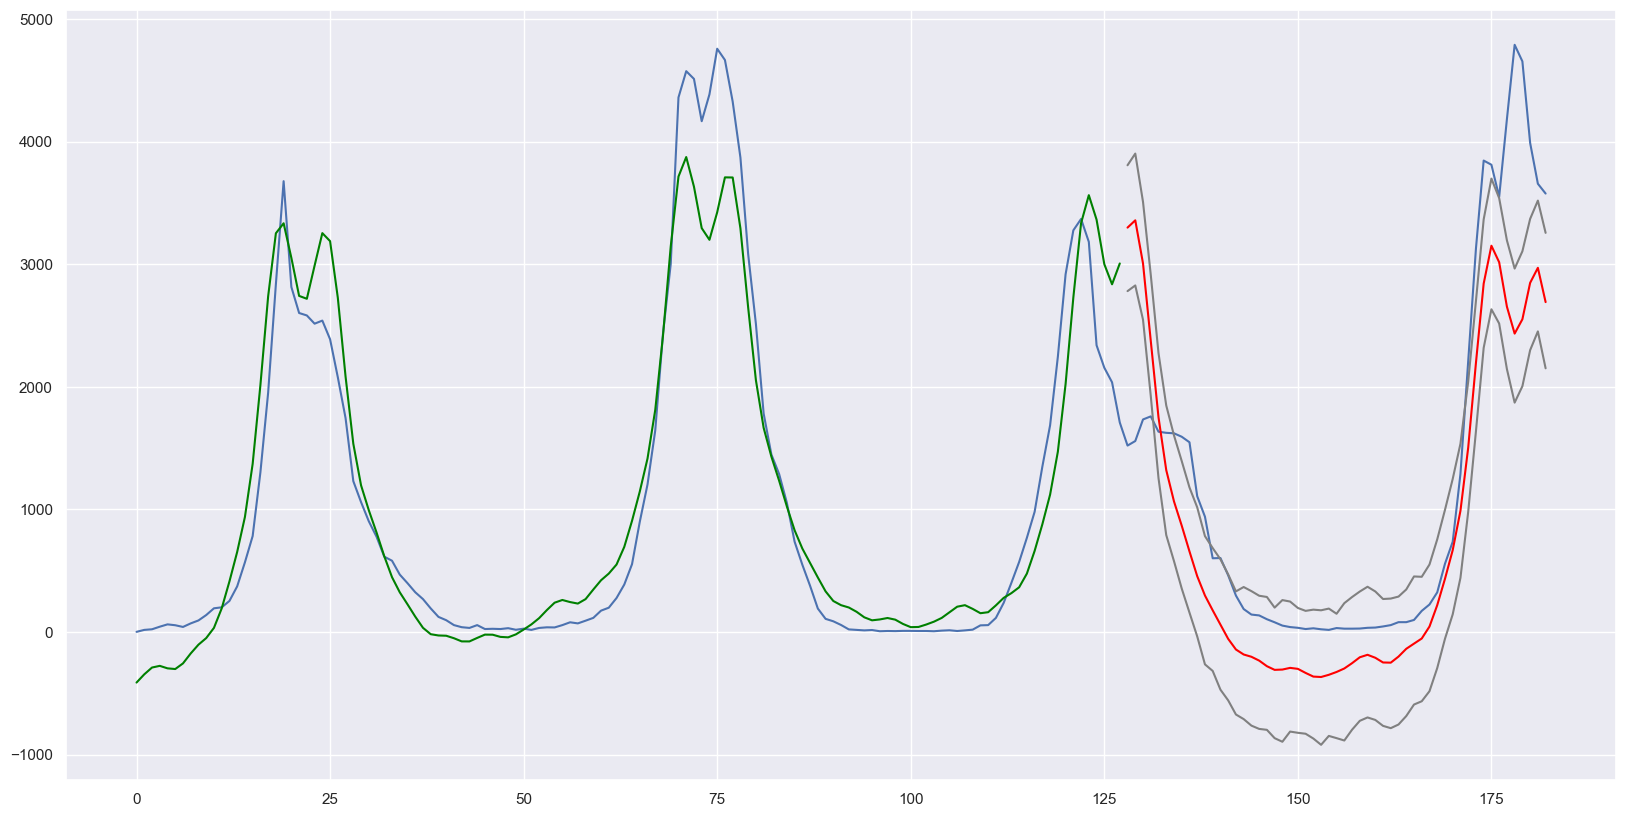

In [77]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')

In [78]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 165419.756
RMSE_train: 406.718
MAE_train: 293.144
MSE_test: 590620.412
RMSE_test: 768.518
MAE_test: 584.57


# Post-COVID

In [150]:
df_flu.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [151]:
df_flu = df_flu.reset_index()
df = df_flu

In [152]:
df.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [153]:
df

,ds,y
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0
...,...,...
372,2022-10-22,438.0
373,2022-10-29,1031.0
374,2022-11-05,2407.0
375,2022-11-12,4144.0


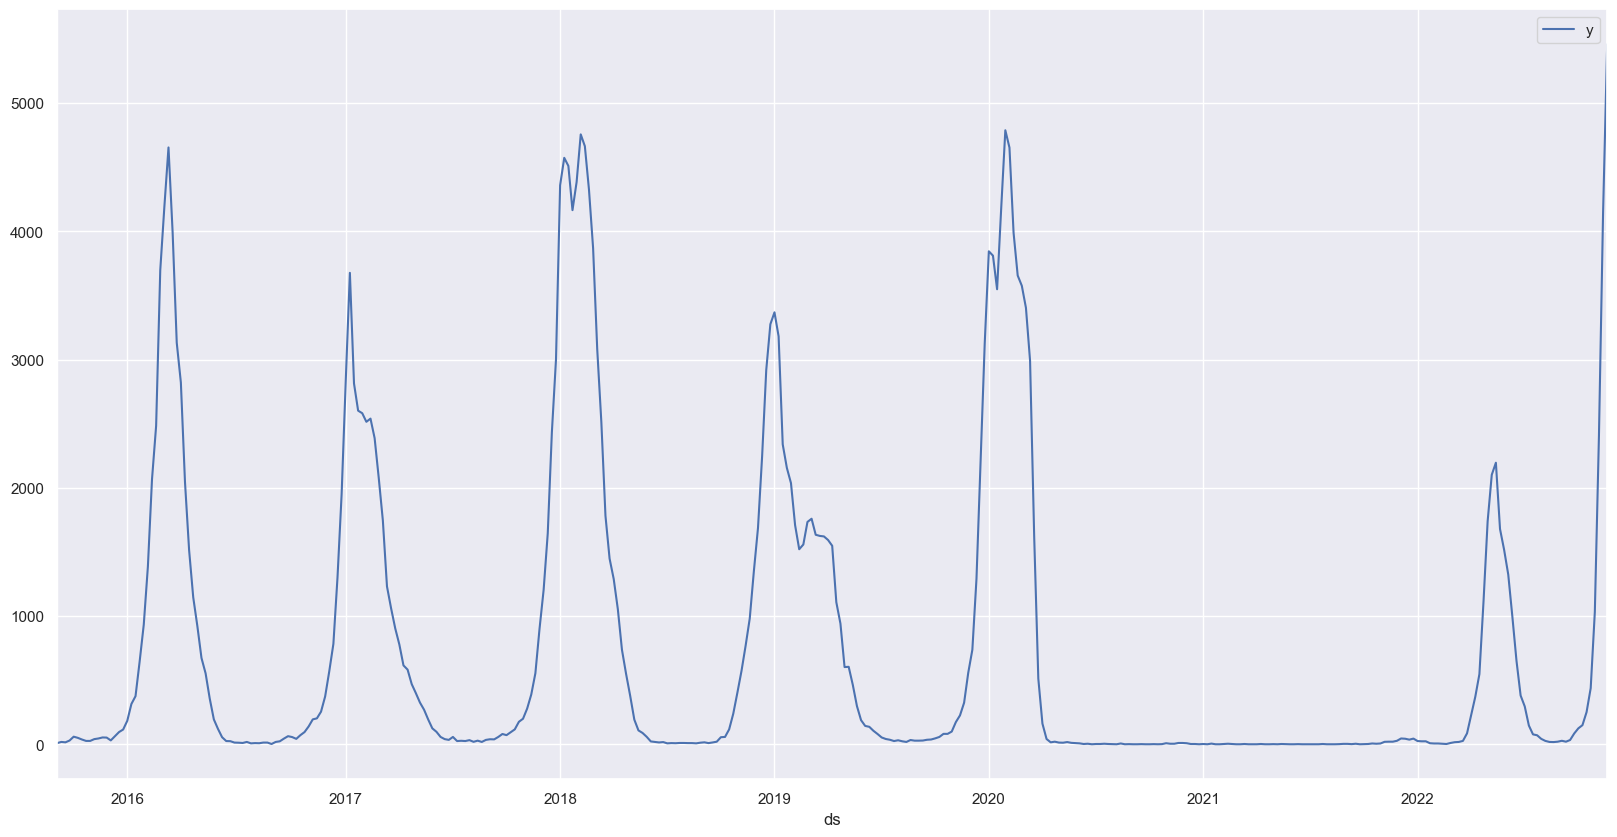

In [83]:
df.set_index('ds').plot();

In [84]:
train_size = int(len(df) *.7)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

In [85]:
m = Prophet(seasonality_mode="additive", yearly_seasonality=True)
m.fit(train)

11:57:41 - cmdstanpy - INFO - Chain [1] start processing
11:57:41 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
pred_test = m.predict(test)
pred_train = m.predict(train)

In [87]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-19,1079.942861,-600.387075,1022.442191,1079.942861,1079.942861,-885.551963,-885.551963,-885.551963,-885.551963,-885.551963,-885.551963,0.0,0.0,0.0,194.390898
1,2020-09-26,1080.734101,-657.034296,979.149176,1080.733179,1080.734101,-891.290094,-891.290094,-891.290094,-891.290094,-891.290094,-891.290094,0.0,0.0,0.0,189.444007
2,2020-10-03,1081.525341,-618.223195,1005.269490,1081.511703,1081.529858,-877.916574,-877.916574,-877.916574,-877.916574,-877.916574,-877.916574,0.0,0.0,0.0,203.608767
3,2020-10-10,1082.316581,-627.178331,1056.186229,1082.278748,1082.339355,-845.510237,-845.510237,-845.510237,-845.510237,-845.510237,-845.510237,0.0,0.0,0.0,236.806344
4,2020-10-17,1083.107821,-557.512302,1093.199753,1083.044972,1083.157142,-820.823160,-820.823160,-820.823160,-820.823160,-820.823160,-820.823160,0.0,0.0,0.0,262.284661


In [88]:
test.head()

,ds,y
263,2020-09-19,1.0
264,2020-09-26,0.0
265,2020-10-03,0.0
266,2020-10-10,1.0
267,2020-10-17,0.0


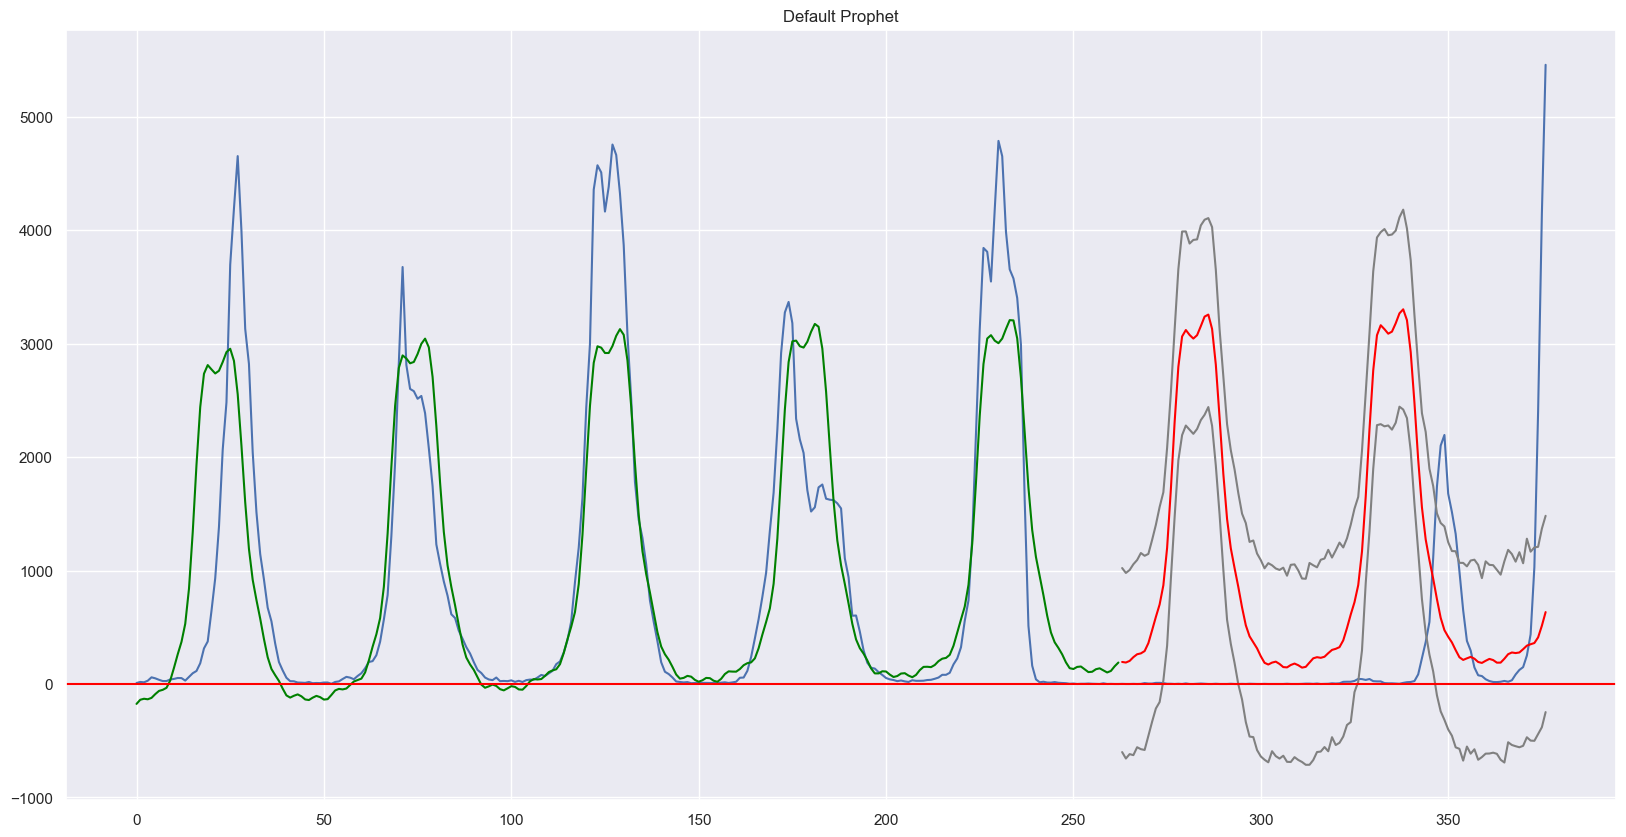

In [89]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Default Prophet');

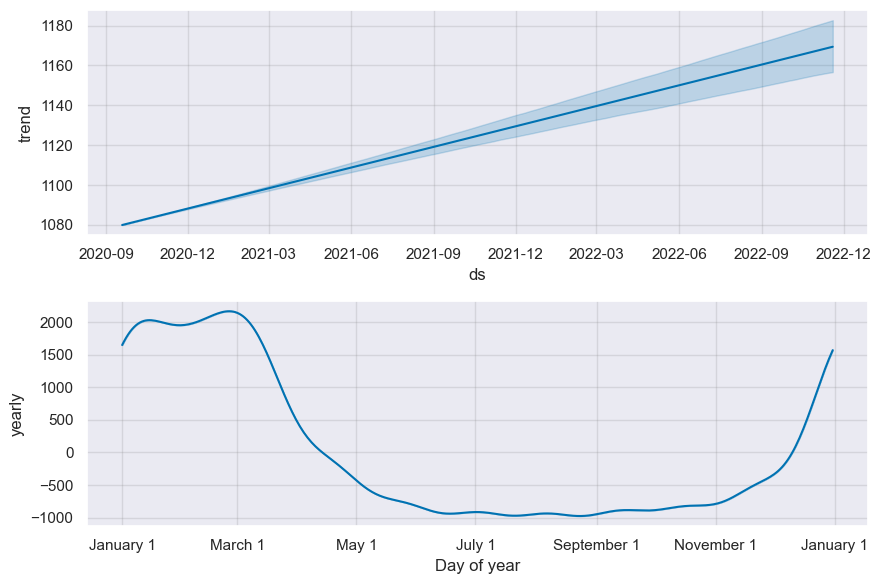

In [90]:
m.plot_components(pred_test);

In [91]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 438080.071
RMSE_train: 661.876
MAE_train: 404.504
MSE_test: 2750673.139
RMSE_test: 1658.515
MAE_test: 1151.004


# Post-COVID with 'Holidays' to mark changepoints

In [122]:
wave_1_start = '2020-01-25'
wave_1_end = '2020-07-17'
wave_2_start = '2020-07-17'
wave_2_end = '2021-03-04'
wave_3_start = '2021-03-04'
wave_3_end = '2021-07-22'
wave_4_start = '2021-07-22'
wave_4_end = '2021-11-03'
wave_5_start = '2021-11-03'
wave_5_end = '2022-02-28'

In [123]:
waves = pd.DataFrame([
    {'holiday': 'wave_1', 'ds': wave_1_start, 'lower_window': 0, 'ds_upper': wave_1_end},
    {'holiday': 'wave_2', 'ds': wave_2_start, 'lower_window': 0, 'ds_upper': wave_2_end},
    {'holiday': 'wave_3', 'ds': wave_3_start, 'lower_window': 0, 'ds_upper': wave_3_end},
    {'holiday': 'wave_4', 'ds': wave_4_start, 'lower_window': 0, 'ds_upper': wave_4_end},
    {'holiday': 'wave_5', 'ds': wave_5_start, 'lower_window': 0, 'ds_upper': wave_5_end},
])
for t_col in ['ds', 'ds_upper']:
    waves[t_col] = pd.to_datetime(waves[t_col])
waves['upper_window'] = round((waves['ds_upper'] - waves['ds']).dt.days/7)
waves

,holiday,ds,lower_window,ds_upper,upper_window
0,wave_1,2020-01-25,0,2020-07-17,25.0
1,wave_2,2020-07-17,0,2021-03-04,33.0
2,wave_3,2021-03-04,0,2021-07-22,20.0
3,wave_4,2021-07-22,0,2021-11-03,15.0
4,wave_5,2021-11-03,0,2022-02-28,17.0


In [124]:
m2 = Prophet(seasonality_mode="additive", yearly_seasonality=True, holidays=waves)
m2.fit(train)

12:04:37 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
pred_test = m2.predict(test)
pred_train = m2.predict(train)

In [126]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,wave_5,wave_5_lower,wave_5_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-19,951.424843,-677.837977,872.471847,951.424843,951.424843,-854.558854,-854.558854,-854.558854,0.0,...,0.0,0.0,0.0,-854.558854,-854.558854,-854.558854,0.0,0.0,0.0,96.865988
1,2020-09-26,950.954039,-751.933606,901.345082,950.954039,950.954039,-860.788638,-860.788638,-860.788638,0.0,...,0.0,0.0,0.0,-860.788638,-860.788638,-860.788638,0.0,0.0,0.0,90.165401
2,2020-10-03,950.483236,-694.151926,843.082025,950.442819,950.510980,-859.110968,-859.110968,-859.110968,0.0,...,0.0,0.0,0.0,-859.110968,-859.110968,-859.110968,0.0,0.0,0.0,91.372269
3,2020-10-10,950.012433,-696.641397,890.477642,949.915249,950.098977,-837.304001,-837.304001,-837.304001,0.0,...,0.0,0.0,0.0,-837.304001,-837.304001,-837.304001,0.0,0.0,0.0,112.708432
4,2020-10-17,949.541630,-674.162131,966.934824,949.370200,949.727962,-808.231843,-808.231843,-808.231843,0.0,...,0.0,0.0,0.0,-808.231843,-808.231843,-808.231843,0.0,0.0,0.0,141.309786


In [127]:
test.head()

,ds,y
263,2020-09-19,1.0
264,2020-09-26,0.0
265,2020-10-03,0.0
266,2020-10-10,1.0
267,2020-10-17,0.0


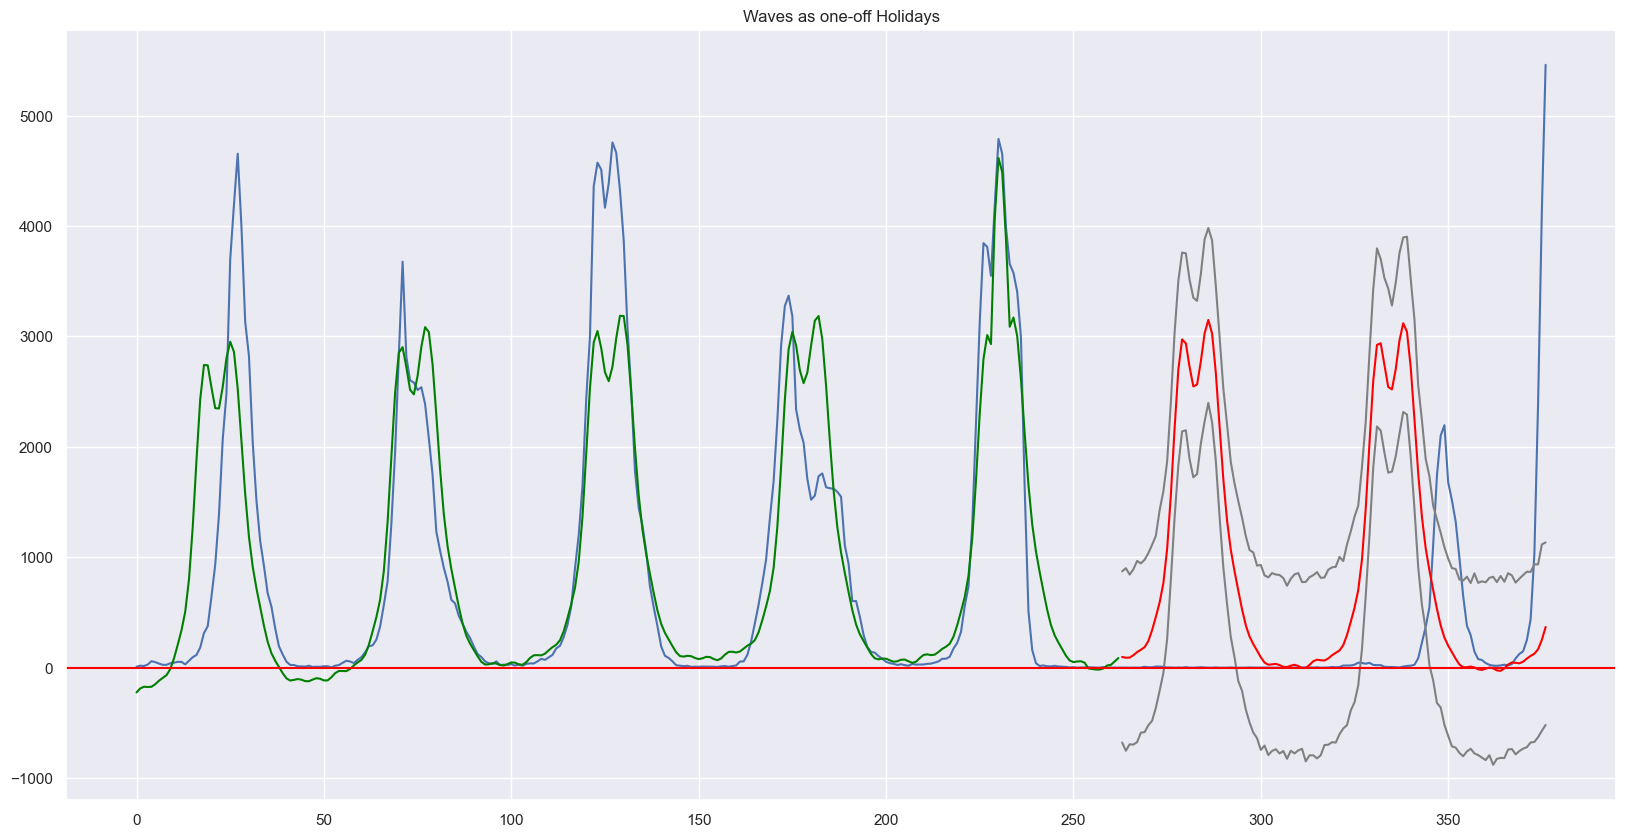

In [128]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Waves as one-off Holidays');

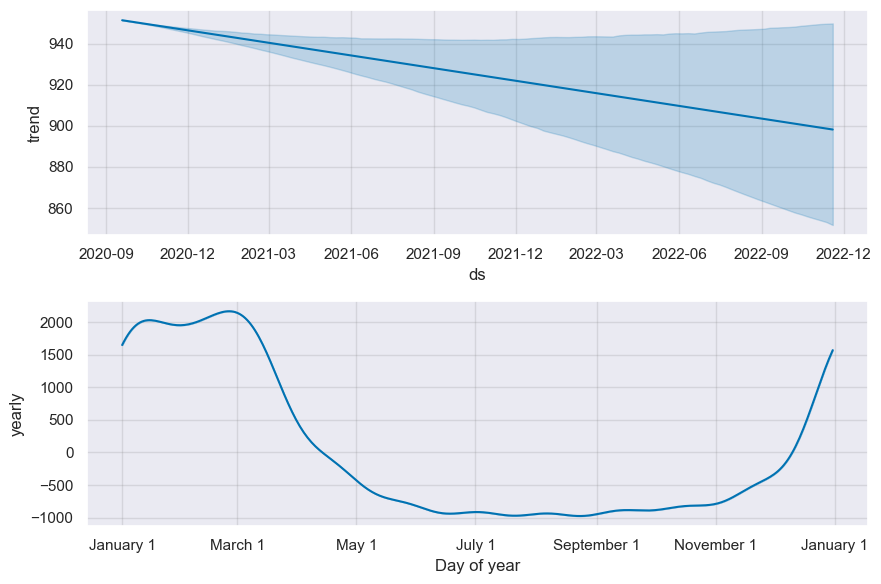

In [129]:
m.plot_components(pred_test);

In [130]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 389993.926
RMSE_train: 624.495
MAE_train: 368.722
MSE_test: 2424153.664
RMSE_test: 1556.969
MAE_test: 1032.994


### Iteration 2

In [131]:
wave_1_start = '2020-03-21' # 1,000 cases total across the country
wave_5_end = '2022-02-28' # end of wave 5


In [132]:
waves = pd.DataFrame([
    {'holiday': 'pandemic', 'ds': wave_1_start, 'lower_window': 0, 'ds_upper': wave_5_end},
])
for t_col in ['ds', 'ds_upper']:
    waves[t_col] = pd.to_datetime(waves[t_col])
waves['upper_window'] = round((waves['ds_upper'] - waves['ds']).dt.days/7)
waves

,holiday,ds,lower_window,ds_upper,upper_window
0,pandemic,2020-03-21,0,2022-02-28,101.0


In [133]:
m2 = Prophet(seasonality_mode="additive", yearly_seasonality=True, holidays=waves)
m2.fit(train)

12:04:45 - cmdstanpy - INFO - Chain [1] start processing
12:04:45 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
pred_test = m2.predict(test)
pred_train = m2.predict(train)

In [135]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,pandemic,pandemic_lower,pandemic_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-19,1226.196997,-483.386632,1175.168870,1226.196997,1226.196997,-907.846125,-907.846125,-907.846125,0.0,...,0.0,0.0,0.0,-907.846125,-907.846125,-907.846125,0.0,0.0,0.0,318.350872
1,2020-09-26,1227.783221,-491.358486,1114.667377,1227.783221,1227.783221,-906.673763,-906.673763,-906.673763,0.0,...,0.0,0.0,0.0,-906.673763,-906.673763,-906.673763,0.0,0.0,0.0,321.109457
2,2020-10-03,1229.369444,-542.063182,1125.757419,1229.354517,1229.378407,-894.202278,-894.202278,-894.202278,0.0,...,0.0,0.0,0.0,-894.202278,-894.202278,-894.202278,0.0,0.0,0.0,335.167166
3,2020-10-10,1230.955667,-424.432843,1175.777412,1230.910166,1230.996302,-867.209232,-867.209232,-867.209232,0.0,...,0.0,0.0,0.0,-867.209232,-867.209232,-867.209232,0.0,0.0,0.0,363.746435
4,2020-10-17,1232.541891,-415.629863,1230.533145,1232.462250,1232.620958,-845.554342,-845.554342,-845.554342,0.0,...,0.0,0.0,0.0,-845.554342,-845.554342,-845.554342,0.0,0.0,0.0,386.987549


In [136]:
test.head()

,ds,y
263,2020-09-19,1.0
264,2020-09-26,0.0
265,2020-10-03,0.0
266,2020-10-10,1.0
267,2020-10-17,0.0


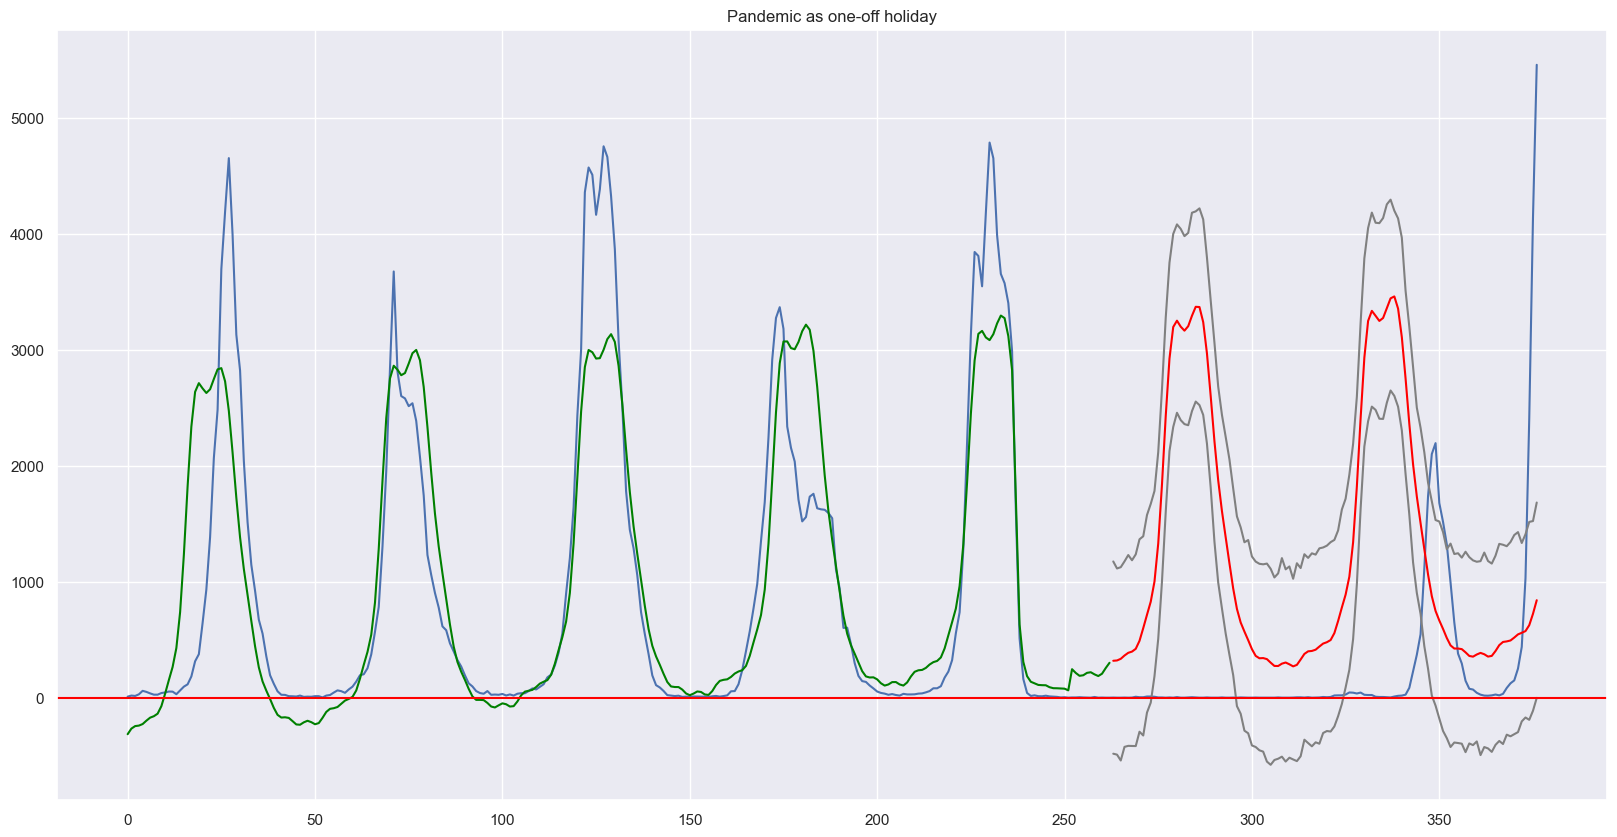

In [137]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Pandemic as one-off holiday');

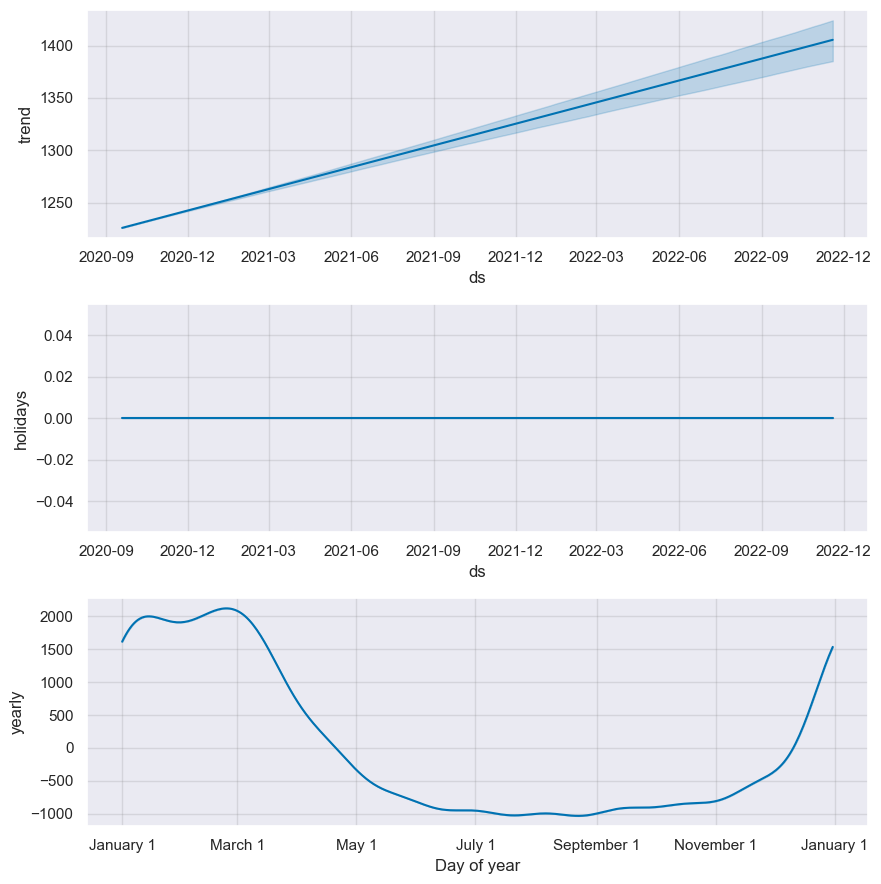

In [138]:
m2.plot_components(pred_test);

In [139]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 400281.464
RMSE_train: 632.678
MAE_train: 393.382
MSE_test: 3059713.155
RMSE_test: 1749.204
MAE_test: 1282.001


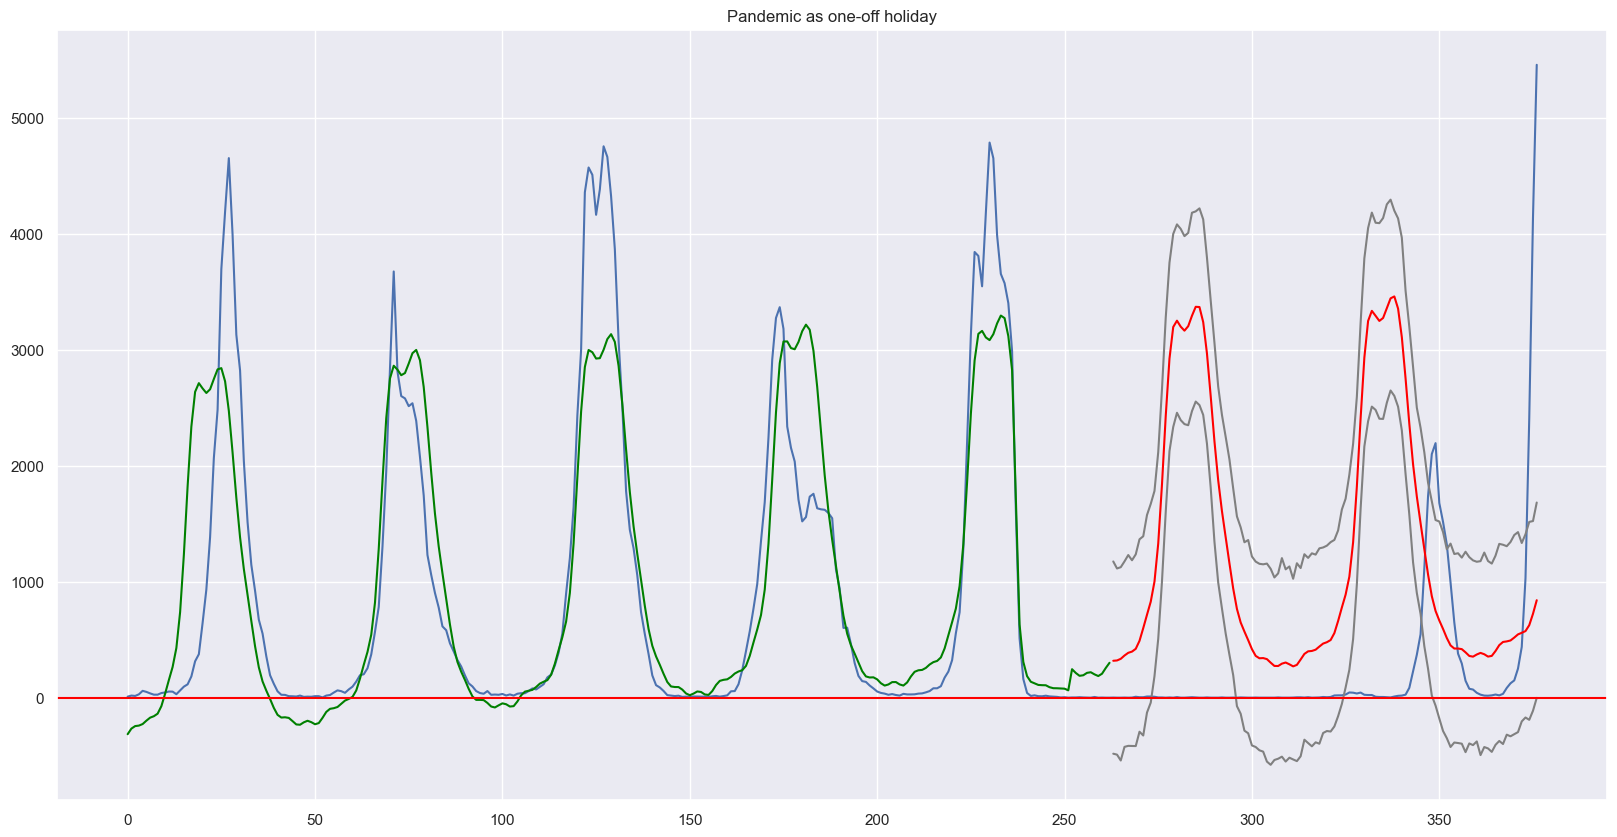

In [140]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Pandemic as one-off holiday');

### Iteration 3

In [55]:
wave_1_start = '2020-01-25'
wave_1_end = '2020-07-17'
wave_2_start = '2020-07-17'
wave_2_end = '2021-03-04'
wave_3_start = '2021-03-04'
wave_3_end = '2021-07-22'
wave_4_start = '2021-07-22'
wave_4_end = '2021-11-03'
wave_5_start = '2021-11-03'
wave_5_end = '2022-02-28'

In [56]:
waves = pd.DataFrame([
    {'holiday': 'wave_1', 'ds': wave_1_start, 'lower_window': 0, 'ds_upper': wave_1_end},
    {'holiday': 'wave_2', 'ds': wave_2_start, 'lower_window': 0, 'ds_upper': wave_2_end},
    {'holiday': 'wave_3', 'ds': wave_3_start, 'lower_window': 0, 'ds_upper': wave_3_end},
    {'holiday': 'wave_4', 'ds': wave_4_start, 'lower_window': 0, 'ds_upper': wave_4_end},
    {'holiday': 'wave_5', 'ds': wave_5_start, 'lower_window': 0, 'ds_upper': wave_5_end},
])
for t_col in ['ds', 'ds_upper']:
    waves[t_col] = pd.to_datetime(waves[t_col])
waves['upper_window'] = round((waves['ds_upper'] - waves['ds']).dt.days/7)
waves

,holiday,ds,lower_window,ds_upper,upper_window
0,wave_1,2020-01-25,0,2020-07-17,25.0
1,wave_2,2020-07-17,0,2021-03-04,33.0
2,wave_3,2021-03-04,0,2021-07-22,20.0
3,wave_4,2021-07-22,0,2021-11-03,15.0
4,wave_5,2021-11-03,0,2022-02-28,17.0


In [57]:
waves

,holiday,ds,lower_window,ds_upper,upper_window
0,wave_1,2020-01-25,0,2020-07-17,25.0
1,wave_2,2020-07-17,0,2021-03-04,33.0
2,wave_3,2021-03-04,0,2021-07-22,20.0
3,wave_4,2021-07-22,0,2021-11-03,15.0
4,wave_5,2021-11-03,0,2022-02-28,17.0


In [60]:
m2 = Prophet(holidays=waves)
m2.fit(train)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

11:52:37 - cmdstanpy - INFO - Chain [1] start processing
11:52:37 - cmdstanpy - INFO - Chain [1] done processing


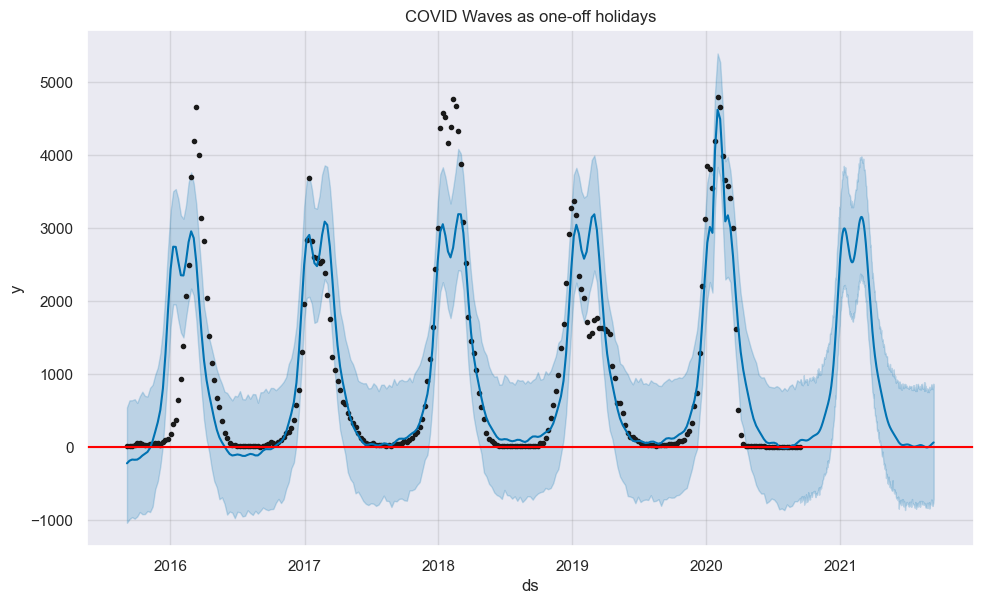

In [61]:
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('COVID Waves as one-off holidays');

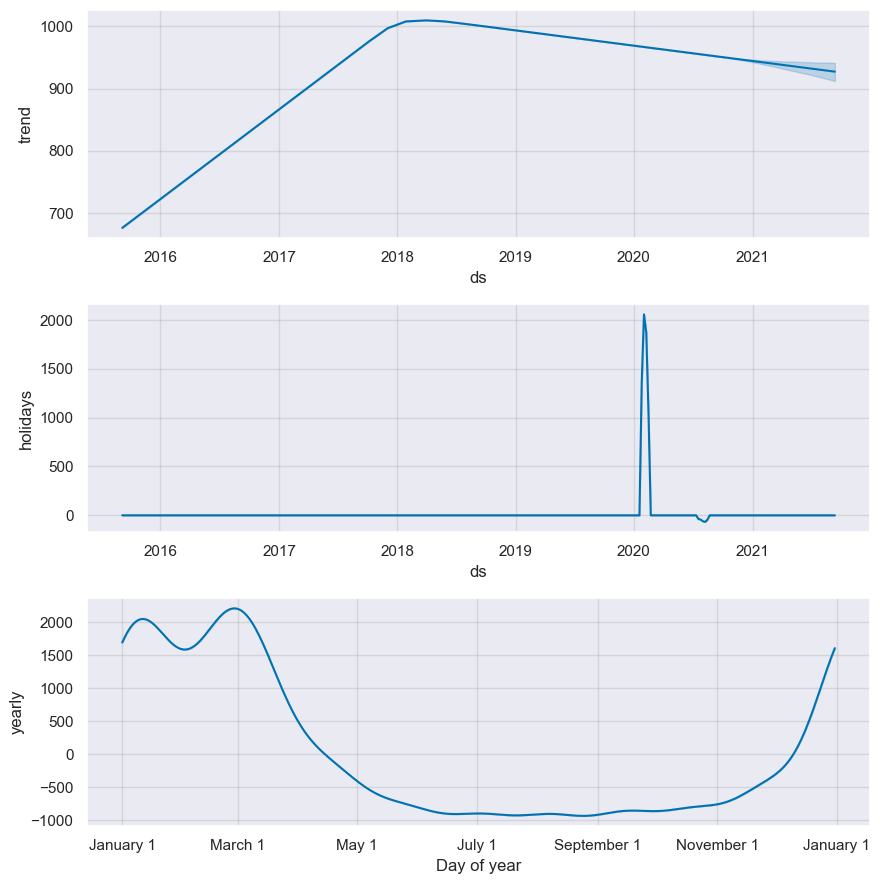

In [62]:
m2.plot_components(forecast2);

In [ ]:
pred_test = m2.predict(test)
pred_train = m2.predict(train)

In [ ]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,wave_5,wave_5_lower,wave_5_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-19,951.424843,-710.456869,856.802486,951.424843,951.424843,-854.558854,-854.558854,-854.558854,0.0,...,0.0,0.0,0.0,-854.558854,-854.558854,-854.558854,0.0,0.0,0.0,96.865988
1,2020-09-26,950.954039,-652.950634,849.844341,950.954039,950.956232,-860.788638,-860.788638,-860.788638,0.0,...,0.0,0.0,0.0,-860.788638,-860.788638,-860.788638,0.0,0.0,0.0,90.165401
2,2020-10-03,950.483236,-715.175164,886.248952,950.451058,950.532956,-859.110968,-859.110968,-859.110968,0.0,...,0.0,0.0,0.0,-859.110968,-859.110968,-859.110968,0.0,0.0,0.0,91.372269
3,2020-10-10,950.012433,-669.221857,878.542961,949.884373,950.137058,-837.304001,-837.304001,-837.304001,0.0,...,0.0,0.0,0.0,-837.304001,-837.304001,-837.304001,0.0,0.0,0.0,112.708432
4,2020-10-17,949.541630,-634.334167,928.124268,949.299643,949.762324,-808.231843,-808.231843,-808.231843,0.0,...,0.0,0.0,0.0,-808.231843,-808.231843,-808.231843,0.0,0.0,0.0,141.309786


In [ ]:
test.head()

,ds,y
263,2020-09-19,1.0
264,2020-09-26,0.0
265,2020-10-03,0.0
266,2020-10-10,1.0
267,2020-10-17,0.0


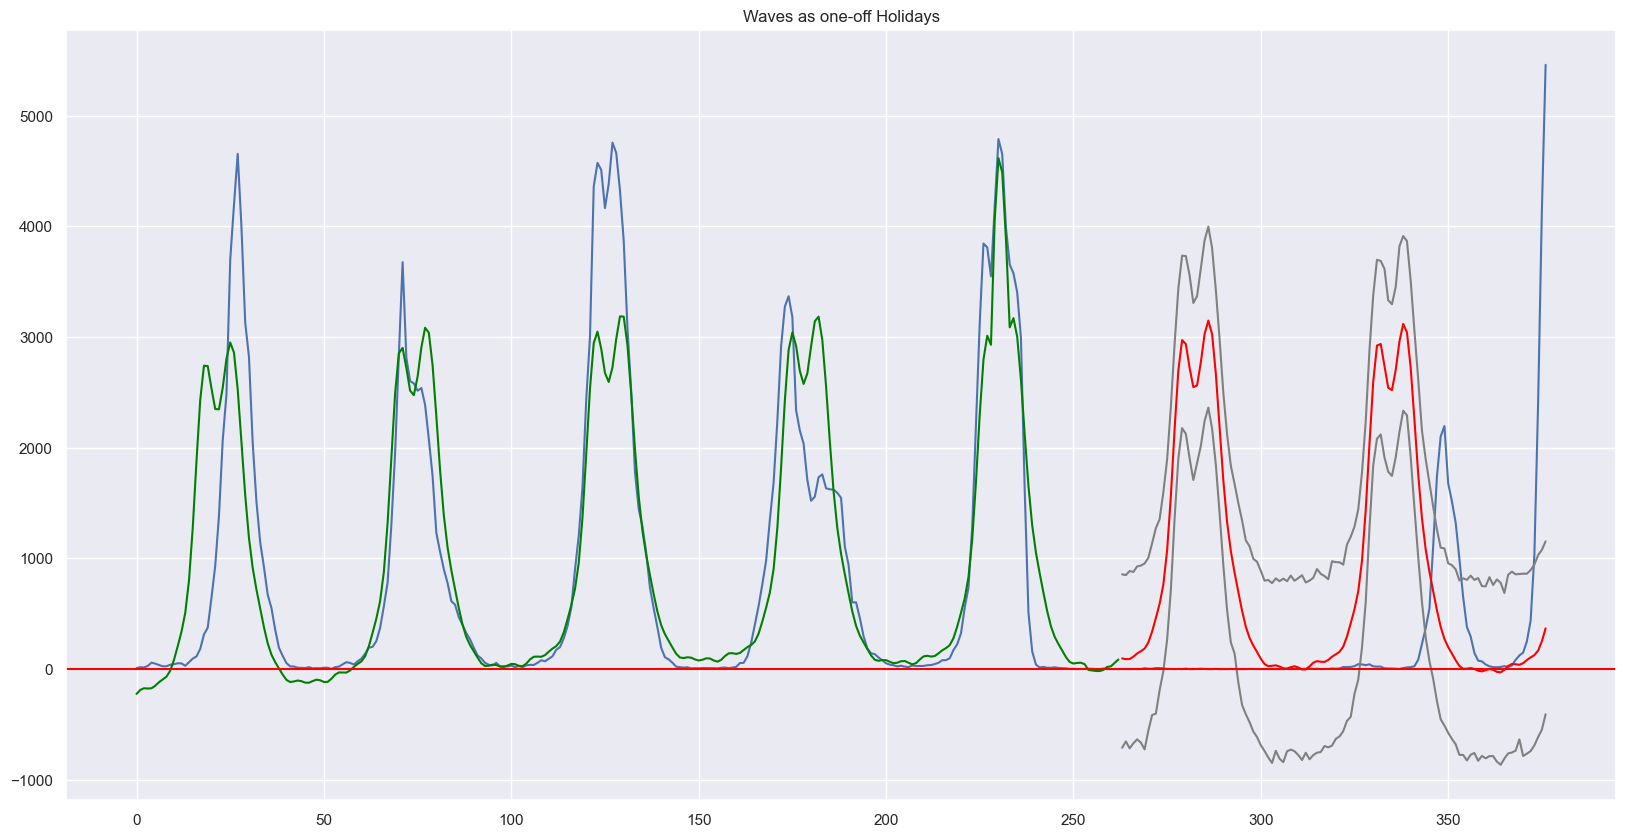

In [ ]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Waves as one-off Holidays');

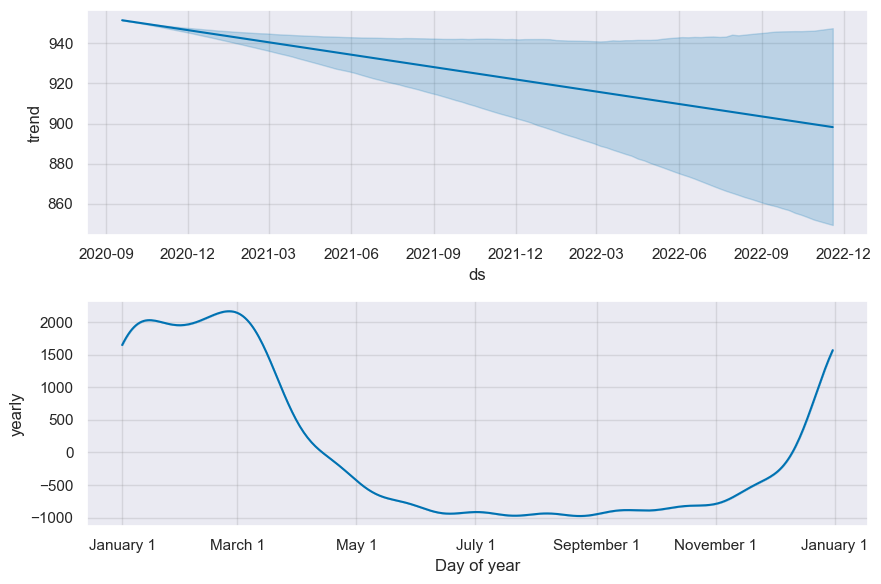

In [ ]:
m.plot_components(pred_test);

In [ ]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 389993.926
RMSE_train: 624.495
MAE_train: 368.722
MSE_test: 2424153.664
RMSE_test: 1556.969
MAE_test: 1032.994


### Iteration 4

In [154]:
wave_1_start = '2020-03-21' # 1,000 cases total across the country
wave_5_end = '2022-02-28' # end of wave 5


In [155]:
waves = pd.DataFrame([
    {'holiday': 'pandemic', 'ds': wave_1_start, 'lower_window': 0, 'ds_upper': wave_5_end},
])
for t_col in ['ds', 'ds_upper']:
    waves[t_col] = pd.to_datetime(waves[t_col])
waves['upper_window'] = round((waves['ds_upper'] - waves['ds']).dt.days/7)
waves

,holiday,ds,lower_window,ds_upper,upper_window
0,pandemic,2020-03-21,0,2022-02-28,101.0


In [156]:
m2 = Prophet(seasonality_mode="additive", yearly_seasonality=True, holidays=waves)
m2.fit(df)

12:58:52 - cmdstanpy - INFO - Chain [1] start processing
12:58:52 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
pred_test = m2.predict(test)
pred_train = m2.predict(train)

In [158]:
pred_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,pandemic,pandemic_lower,pandemic_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-19,689.638691,-1130.396896,1185.937267,689.638691,689.638691,-753.246351,-753.246351,-753.246351,0.0,...,0.0,0.0,0.0,-753.246351,-753.246351,-753.246351,0.0,0.0,0.0,-63.607661
1,2020-09-26,687.485998,-1173.815533,1163.842227,687.485998,687.485998,-713.950295,-713.950295,-713.950295,0.0,...,0.0,0.0,0.0,-713.950295,-713.950295,-713.950295,0.0,0.0,0.0,-26.464297
2,2020-10-03,685.333306,-1176.421226,1193.060477,685.333306,685.333306,-680.875559,-680.875559,-680.875559,0.0,...,0.0,0.0,0.0,-680.875559,-680.875559,-680.875559,0.0,0.0,0.0,4.457747
3,2020-10-10,683.180614,-1148.001718,1169.588735,683.180614,683.180614,-691.464420,-691.464420,-691.464420,0.0,...,0.0,0.0,0.0,-691.464420,-691.464420,-691.464420,0.0,0.0,0.0,-8.283806
4,2020-10-17,681.027922,-1225.784383,1139.287436,681.027922,681.027922,-709.900685,-709.900685,-709.900685,0.0,...,0.0,0.0,0.0,-709.900685,-709.900685,-709.900685,0.0,0.0,0.0,-28.872763


In [159]:
test.head()

,ds,y
263,2020-09-19,1.0
264,2020-09-26,0.0
265,2020-10-03,0.0
266,2020-10-10,1.0
267,2020-10-17,0.0


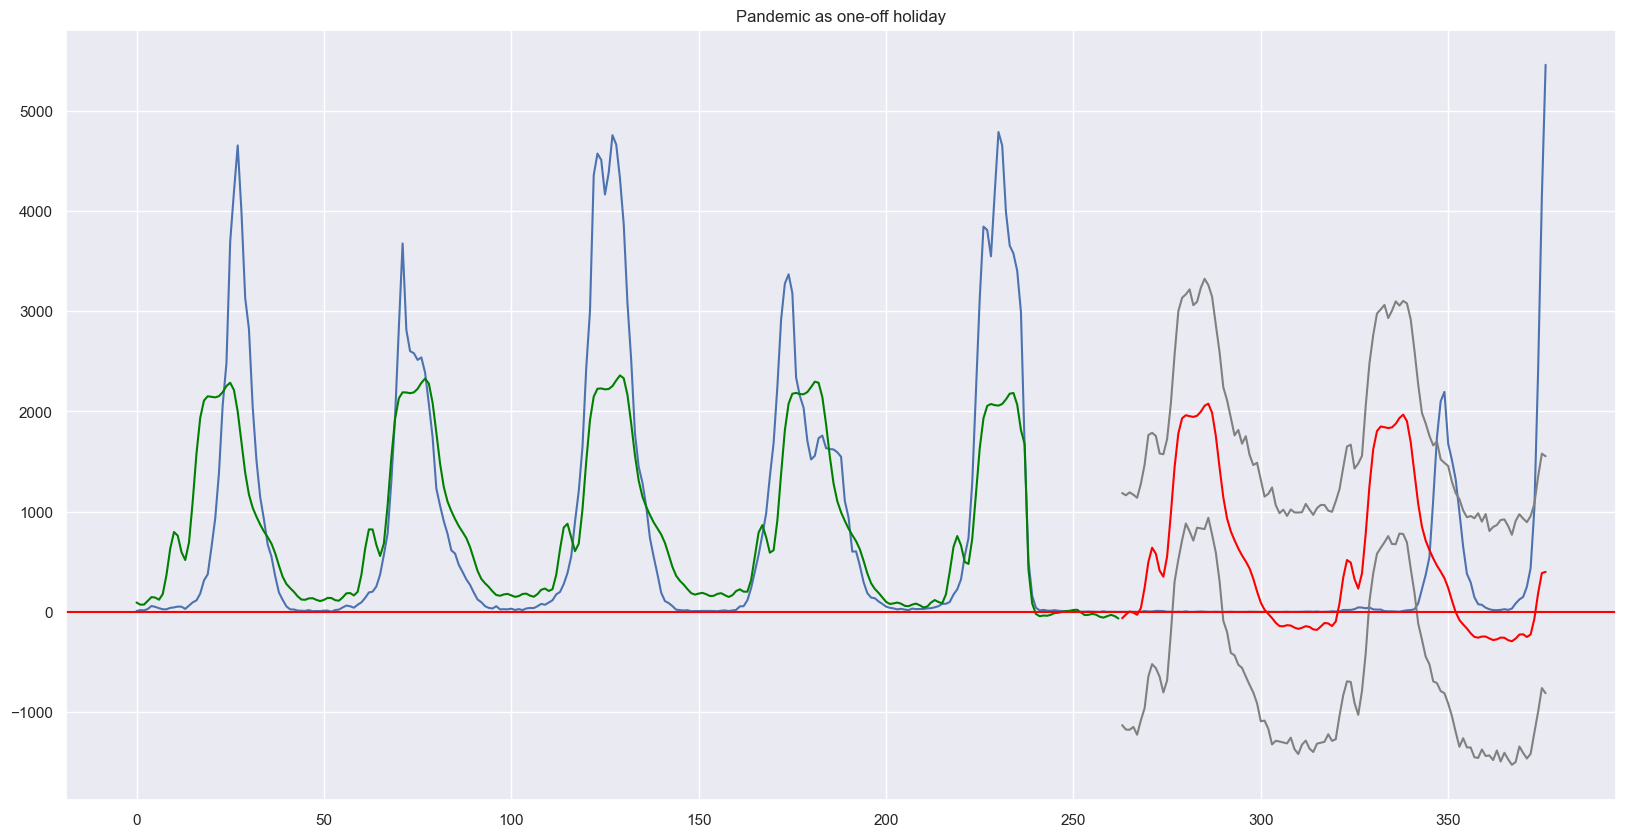

In [160]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Pandemic as one-off holiday');

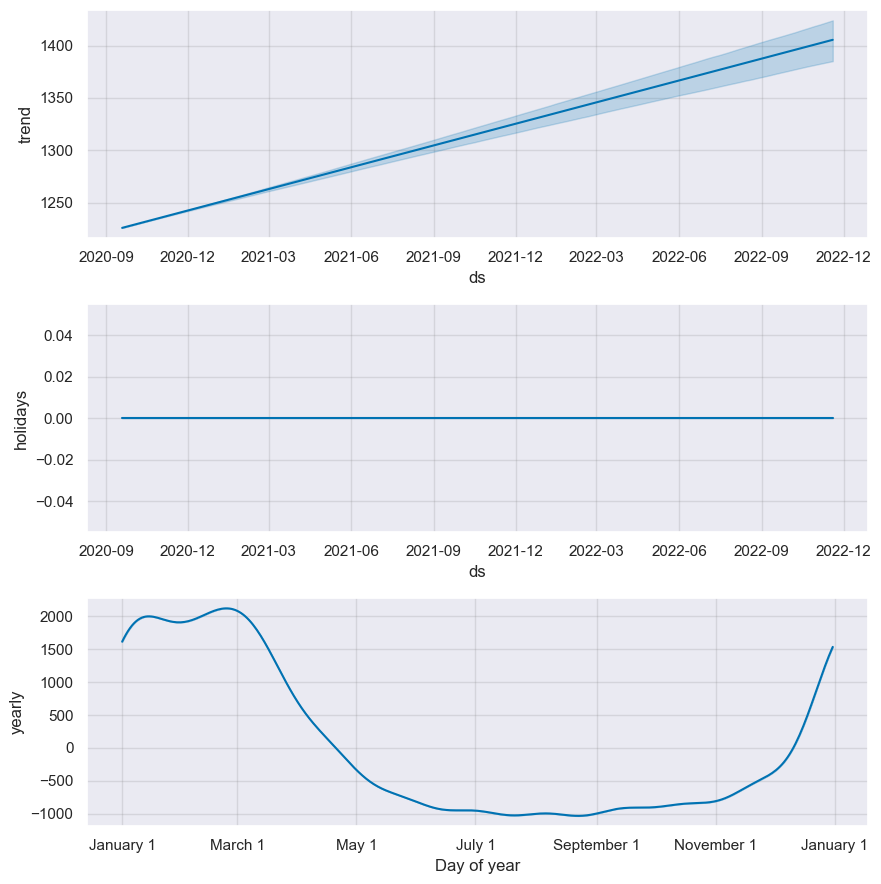

In [ ]:
m2.plot_components(pred_test);

In [ ]:
# evaluate prediction for 1 week ahead

MSE_train = round(mean_squared_error(train['y'], pred_train['yhat']),3)
RMSE_train = round(mean_squared_error(train['y'], pred_train['yhat'], squared=False),3)
MAE_train = round(mean_absolute_error(train['y'], pred_train['yhat']),3)
print(f'MSE_train: {MSE_train}')
print(f'RMSE_train: {RMSE_train}')
print(f'MAE_train: {MAE_train}')

MSE_test = round(mean_squared_error(test['y'], pred_test['yhat']),3)
RMSE_test = round(mean_squared_error(test['y'], pred_test['yhat'], squared=False),3)
MAE_test = round(mean_absolute_error(test['y'], pred_test['yhat']),3)
print(f'MSE_test: {MSE_test}')
print(f'RMSE_test: {RMSE_test}')
print(f'MAE_test: {MAE_test}')

MSE_train: 400281.464
RMSE_train: 632.678
MAE_train: 393.382
MSE_test: 3059713.155
RMSE_test: 1749.204
MAE_test: 1282.001


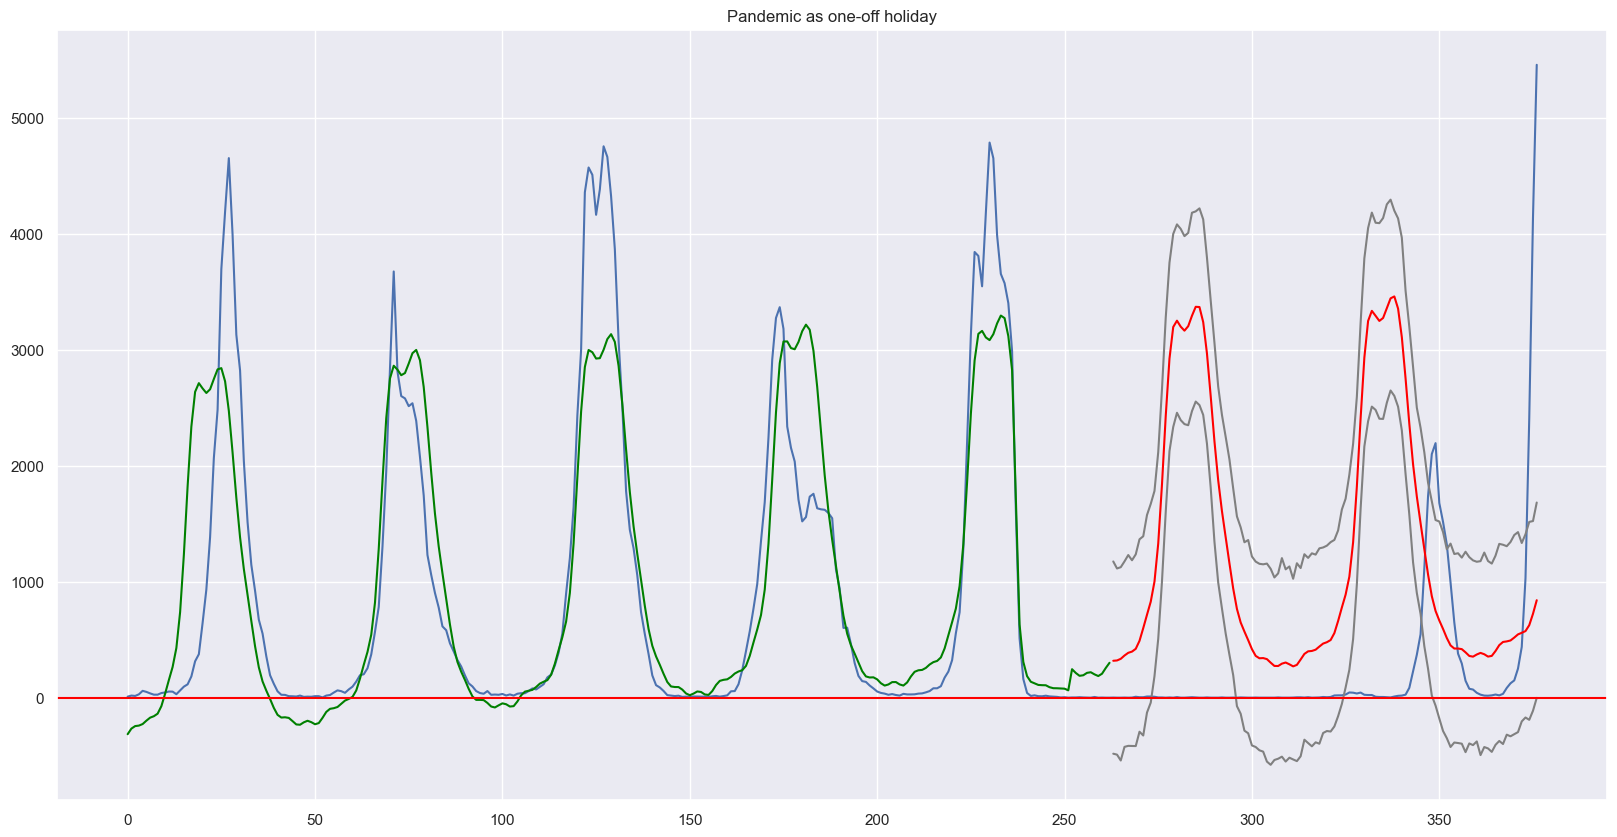

In [ ]:
plt.plot(df.index, df['y'].values)
plt.plot(df.index[:train_size], pred_train['yhat'], color='green')
plt.plot(df.index[train_size:], pred_test['yhat'], color='red')
plt.plot(df.index[train_size:], pred_test['yhat_lower'], color='grey')
plt.plot(df.index[train_size:], pred_test['yhat_upper'], color='grey')
plt.axhline(y=0, color='red')
plt.title('Pandemic as one-off holiday');